Testing

In [2]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
df = pd.read_csv("./gss.csv", low_memory=False)
print(df.shape)
df.head()
print(df.columns)
filtered_df = df[(df['year']==2020)| (df['year']==2021) | (df['year']==2022)]


(72390, 6645)
Index(['Unnamed: 0', 'year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'occ',
       'prestige', 'wrkslf',
       ...
       'instype02', 'instype03', 'instype04', 'totalincentive', 'wtssps_nea',
       'wtssnrps_nea', 'wtssps_next', 'wtssnrps_next', 'wtsscomp',
       'wtsscompnr'],
      dtype='object', length=6645)


In [3]:
selected_columns = ['age', 'sex', 'marital', 'fluvax']
final_data_frame = filtered_df[selected_columns]


final_data_frame = final_data_frame.dropna(subset=['fluvax', 'age'])

nan_counts = final_data_frame.isna().sum()
print(nan_counts)

print(final_data_frame.shape)
print(final_data_frame.head())



age        0
sex        0
marital    0
fluvax     0
dtype: int64
(1198, 4)
        age     sex        marital fluvax
68846  72.0  female       divorced    yes
68849  23.0  female  never married     no
68850  62.0    male  never married     no
68856  57.0  female        widowed     no
68863  80.0  female        married    yes


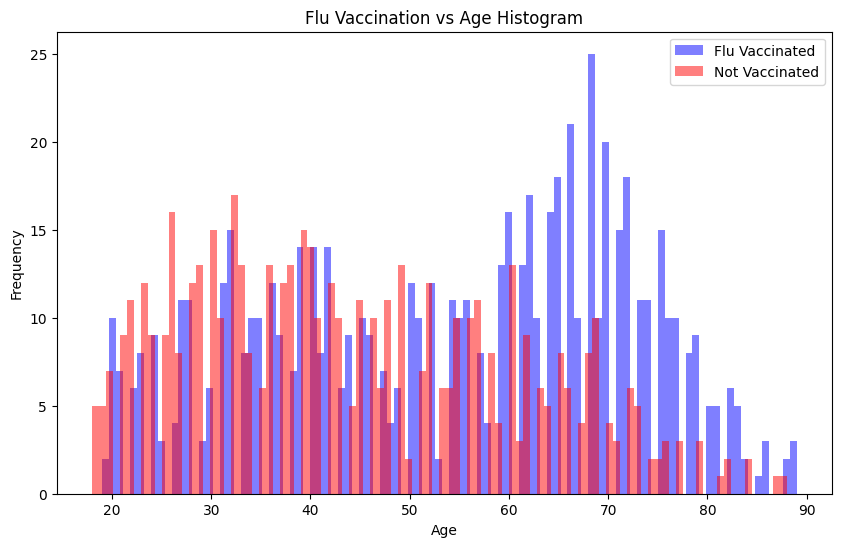

In [4]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(10, 6))
# age_range = range(0, 130, 10)
plt.hist(final_data_frame[final_data_frame['fluvax'] == 'yes']['age'], bins=100, alpha=0.5, label='Flu Vaccinated', color='blue')
plt.hist(final_data_frame[final_data_frame['fluvax'] == 'no']['age'], bins=100, alpha=0.5, label='Not Vaccinated', color='red')

# Set the y-axis limits to show frequencies within the range of 1 to 500
# plt.ylim(1, 500)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Flu Vaccination vs Age Histogram')
plt.legend()

# Show the histogram
plt.show()

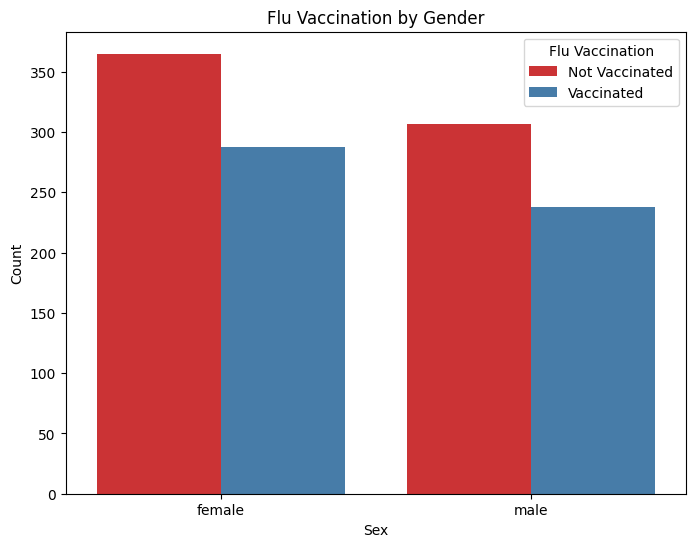

In [5]:
import seaborn as sns

# Assuming you have your 'final_data_frame' with 'sex' and 'fluvax' columns

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='fluvax', data=final_data_frame, palette='Set1')

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Flu Vaccination by Gender')

# Show the legend for the 'fluvax' values
plt.legend(title='Flu Vaccination', labels=['Not Vaccinated', 'Vaccinated'])

# Show the graph
plt.show()